In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.callbacks import EarlyStopping

### Data Analysis

In [31]:
df = pd.read_csv('/home/alvaro/tf_templates/DATA/RSCCASN.csv', index_col='DATE', parse_dates=True)
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [32]:
df.columns = ['Sales']

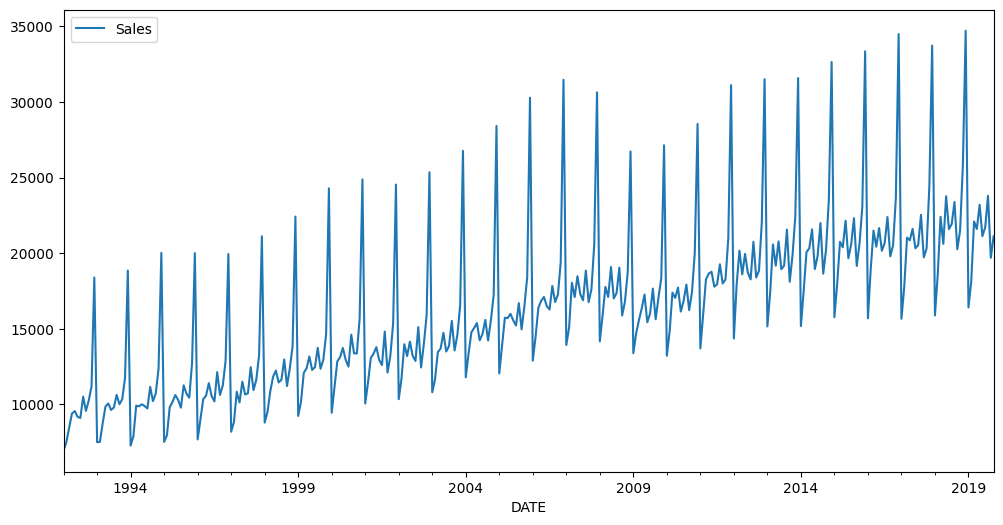

In [33]:
df.plot(figsize=(12,6));

### Train Test Split

In [34]:
test_size = 18 # 18 months
test_ind = len(df) - test_size

In [35]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

### Scale Data

In [36]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Time Series Generator

In [37]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

### Model Training

In [38]:
n_features = 1

In [43]:
model = Sequential([
    Input(shape=(length, n_features)),
    SimpleRNN(units=100, activation='relu'),
    Dense(units=1)
])

In [44]:
model.compile(optimizer='adam', loss='mse')

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [46]:
model.fit(generator, epochs=100, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0304 - val_loss: 0.0050
Epoch 2/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0074 - val_loss: 0.0016
Epoch 3/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 8.6619e-04
Epoch 4/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 5/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 6/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 3.0914e-04
Epoch 7/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 9/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 3.5932e-04
Epoch 10/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014 - val_loss: 4.8875e-04
Epoch 11/100
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - val_loss: 6.9690e-04
Epoch 12/100
304/304 

### Evaluation

In [47]:
history = pd.DataFrame(model.history.history)

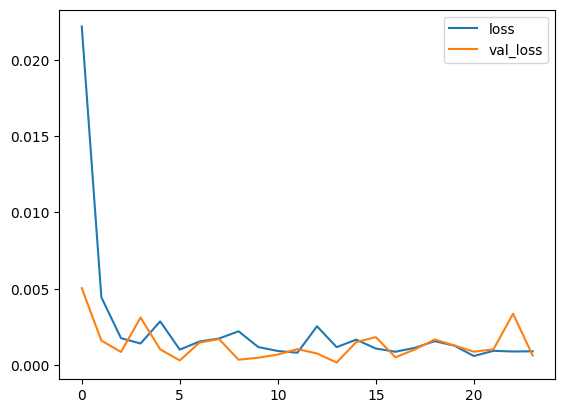

In [48]:
history[['loss', 'val_loss']].plot();

In [49]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(scaled_test)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [62]:
predictions = scaler.inverse_transform(test_predictions)
test.loc[:, 'Predictions'] = predictions

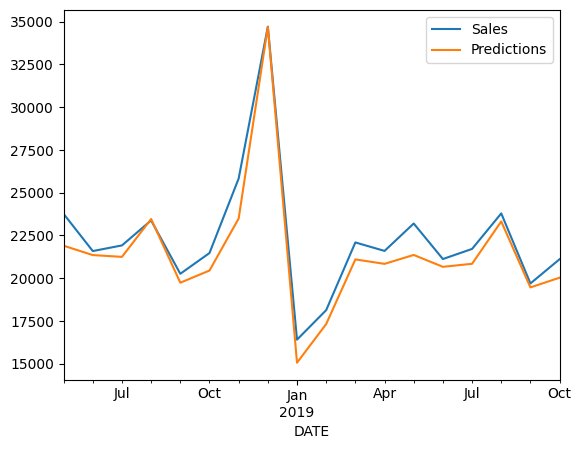

In [51]:
test.plot();

### Forecasting

In [52]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [53]:
forecast = []
periods = 12
first_eval_batch = scaled_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_prediction = model.predict(current_batch)[0]
    forecast.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [54]:
forecast = scaler.inverse_transform(forecast)

In [55]:
forecast

array([[23925.00136089],
       [35618.00080109],
       [15387.76378846],
       [17433.45965314],
       [21183.14982796],
       [21190.18566561],
       [22355.13401604],
       [20849.55413437],
       [21235.86978483],
       [23976.88880157],
       [19614.36160946],
       [20249.23382425]])

In [56]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [57]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods, freq='MS')

In [58]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

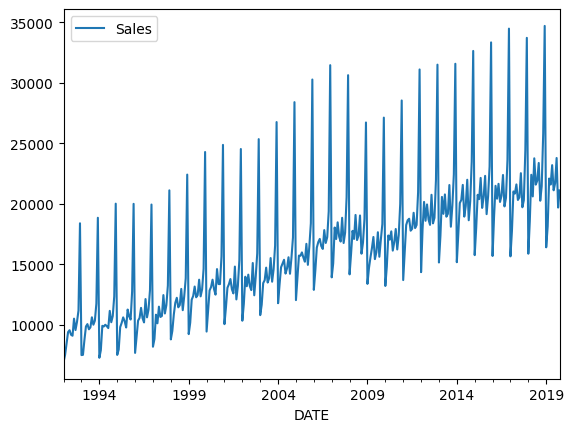

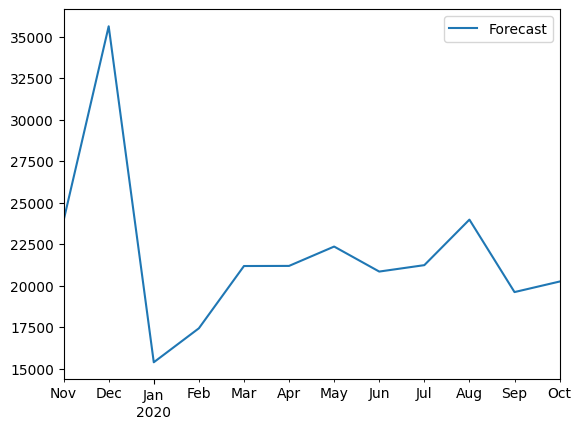

In [59]:
df.plot()
forecast_df.plot();

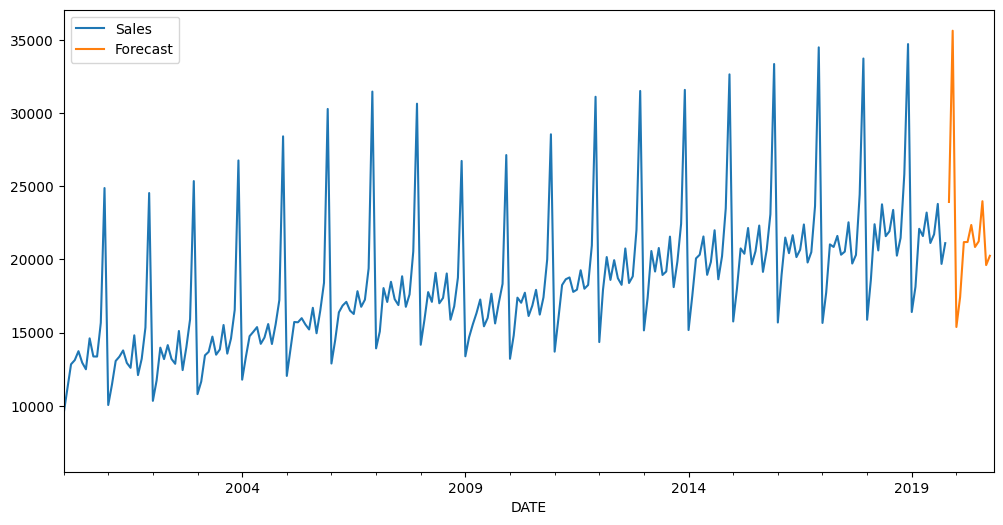

In [60]:
forecast_df.plot(ax=df.plot(), figsize=(12,6))
plt.xlim('2000-01-01', '2020-11-01');